# CNN FOR CANCER DETECTION WITH GENE EXPRESSION 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from sklearn.datasets import make_blobs
# from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

#### ordered gene expression dataset

In [2]:
df1 = pd.read_csv('D:/ROSALIND_problems/Deep_learning_project/gene_data_ordered.csv',sep=';')
df1.head()
df1.shape
print('there is {} patient for {} gene , no extensive quality control yet'.format(df1.shape[0],df1.shape[1]))

there is 427 patient for 17323 gene , no extensive quality control yet


In [3]:
# rename the first column as barcode
#df1.rename(columns = {"Unnamed: 0":"barcode"},inplace = True)

#### Patient data with cancer label for each patient ( barcode) 

In [3]:
df2 = pd.read_csv('D:/ROSALIND_problems/Deep_learning_project/data_patient.csv',sep=';')
df2.head()

,Unnamed: 0,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,...,paper_focal.deletion.in.PTPRD,paper_focal.deletion.in.KDM6A,paper_Neoantigen.load,paper_HLA.mutation,paper_Fusion.in.FGFR3,paper_Fusion.in.PPARG,paper_Fusion.in.PTPN13,paper_Fusion.in.RHOA,paper_Fusion.in.TNFRSF21,paper_Fusion.in.ASIP
0,1,TCGA-CF-A1HS-01A-11R-A13Y-07,TCGA-CF-A1HS,TCGA-CF-A1HS-01A,TP,Primary solid Tumor,TCGA-CF-A1HS-01A,1,Not Reported,0a01e5ba-5549-4027-9e84-1bbb163a8f07,...,.,.,791.0,NaN,no,no,no,no,no,no
1,2,TCGA-GD-A3OQ-11A-21R-A220-07,TCGA-GD-A3OQ,TCGA-GD-A3OQ-11A,NT,Solid Tissue Normal,TCGA-GD-A3OQ-11A,11,NaN,fa1b5772-8254-49ba-a385-af8c9ac7fa4f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,TCGA-ZF-A9R2-01A-11R-A39I-07,TCGA-ZF-A9R2,TCGA-ZF-A9R2-01A,TP,Primary solid Tumor,TCGA-ZF-A9R2-01A,1,NaN,d0027b26-44ea-4276-9ad4-e0c47a4564e9,...,Loss,.,400.0,NaN,no,no,no,no,no,no
3,4,TCGA-KQ-A41N-01A-11R-A33J-07,TCGA-KQ-A41N,TCGA-KQ-A41N-01A,TP,Primary solid Tumor,TCGA-KQ-A41N-01A,1,NaN,85d9b3ae-d14a-445f-83bf-e4a9f9b076b8,...,.,.,880.0,NaN,no,no,no,no,no,no
4,5,TCGA-GC-A6I3-11A-11R-A31N-07,TCGA-GC-A6I3,TCGA-GC-A6I3-11A,NT,Solid Tissue Normal,TCGA-GC-A6I3-11A,11,NaN,a6bd07c0-2568-42a3-8433-5f2ebfec34b2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# choose diagnosis
Y = df2[['primary_diagnosis']]
Y

,primary_diagnosis
0,"Squamous cell carcinoma, NOS"
1,Transitional cell carcinoma
2,Papillary transitional cell carcinoma
3,Transitional cell carcinoma
4,Transitional cell carcinoma
...,...
422,Papillary transitional cell carcinoma
423,Papillary transitional cell carcinoma
424,Transitional cell carcinoma
425,Transitional cell carcinoma


In [5]:
# transform the labels
ord_enc = OrdinalEncoder()
Y["classes"] = ord_enc.fit_transform(Y)
Y

C:\Users\abdel\AppData\Local\Temp\ipykernel_11588\159440998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["classes"] = ord_enc.fit_transform(Y)


,primary_diagnosis,classes
0,"Squamous cell carcinoma, NOS",3.0
1,Transitional cell carcinoma,4.0
2,Papillary transitional cell carcinoma,2.0
3,Transitional cell carcinoma,4.0
4,Transitional cell carcinoma,4.0
...,...,...
422,Papillary transitional cell carcinoma,2.0
423,Papillary transitional cell carcinoma,2.0
424,Transitional cell carcinoma,4.0
425,Transitional cell carcinoma,4.0


In [6]:
classes=Y["classes"]
labels = np_utils.to_categorical(classes)
print(labels[:10])

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


#### QUALITY CONTROL 

In [98]:
X1['CDY1B'].mean()

0.004455503512880561

In [81]:
# delete the columns that contains all the same value
X1 = df1[[c for c in list(df1)
       if len(df1[c].unique())>1]]
len(X1.columns)
X1.head(n=10)

,DDX11L2,WASH7P,OR4F5,OR4F29,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,...,BPY2,DAZ1,DAZ2,TTTY3B,CDY1B,TTTY17B,DAZ3,DAZ4,TTTY4C,CDY1
0,0.5977,714.8834,0.0,0.0000,4.7818,2.2893,2919.4082,95.0389,69.3365,58.5774,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.3318,1619.5452,0.0,0.0000,13.6628,200.2738,1712.8556,122.9655,426.5469,80.3108,...,0.0,10.9969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.5803,1644.6910,0.0,0.0000,9.8052,97.8816,3204.4020,170.3006,476.3256,406.6572,...,0.0,5.1606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35.4381,6565.7216,0.0,0.0000,30.2835,359.8454,4218.1186,739.6907,340.8505,2218.4278,...,0.0,5.7990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,3306.7729,0.0,0.0000,17.2643,581.7795,4288.7384,150.0664,41.8327,559.0969,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,61.0291,1561.4348,0.0,0.6492,7.4663,17.7796,3130.7353,112.3194,24.0221,65.8984,...,0.0,0.3246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.6695,1926.3214,0.0,0.0000,13.3476,160.6834,4191.1586,444.7411,641.7512,252.5360,...,0.0,14.4154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,38.1827,1853.6944,0.0,1.1014,11.3814,301.7090,3435.4181,90.6838,5.5071,96.9252,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0136,1495.0323,0.0,0.8194,13.1107,412.8075,1310.8430,114.7188,198.2997,237.2222,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,47.4632,2303.2596,0.0,0.0000,4.7463,330.9221,2831.8530,199.7769,359.8574,380.5686,...,0.0,0.4315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X1.isna().sum().sum()

0

In [17]:
X1.describe()

,DDX11L2,WASH7P,OR4F5,OR4F29,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,...,BPY2,DAZ1,DAZ2,TTTY3B,CDY1B,TTTY17B,DAZ3,DAZ4,TTTY4C,CDY1
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,...,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,27.058008,2261.550563,0.010946,0.521973,16.594174,112.639181,3471.639878,256.125571,364.895211,323.916613,...,0.011011,88.483718,4.993077,0.008806,0.004456,0.000852,4.140197,0.793788,0.043419,0.003546
std,30.967319,1551.444726,0.103170,1.016683,10.895465,274.489231,1313.424183,184.066782,319.624284,381.285617,...,0.108295,1044.972114,75.706862,0.118878,0.046433,0.017606,65.494015,12.002184,0.486636,0.073268
min,0.000000,396.843800,0.000000,0.000000,2.859500,0.000000,901.796000,11.319000,0.000000,4.493500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.403200,1288.349650,0.000000,0.000000,9.623900,12.850950,2592.119900,141.434650,131.644000,98.608650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.658000,1820.743900,0.000000,0.000000,14.030400,41.227000,3284.433300,208.887100,281.825200,215.412800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.197650,2626.580950,0.000000,0.686700,21.157200,128.971550,4092.315550,315.337400,486.242750,406.347850,...,0.000000,3.072400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,200.980400,11513.491600,1.514000,11.550600,120.431500,4922.406700,9863.251300,1712.280500,1750.463600,3562.216300,...,1.783200,18178.632500,1537.608700,1.866500,0.559100,0.363800,1316.052300,215.259700,9.394100,1.514000


In [86]:
 #drop the coloumns which contains too many NAN if we have many NANs ( DON't UDNERSTAND THE CODE)
X2 = X1.dropna(thresh= 10, axis=1)
len(X2.columns)
X2 = X1.fillna(X1.mean())
X2.isna().sum().sum()


KeyboardInterrupt: 

#### Apply treshold based on expression 

In [88]:
########## normalization ###########
scaler =  preprocessing.StandardScaler().fit(X1)
data = scaler.transform(X1)
# log2 scaler
#data = np.log2(X1)
#print(data)

In [91]:
print(type(data))
print(data.shape)
data


<class 'numpy.ndarray'>
(427, 17072)


array([[-0.85546143, -0.99808998, -0.1062205 , ..., -0.06621453,
        -0.08932791, -0.04845016],
       [-0.70240804, -0.41429671, -0.1062205 , ..., -0.06621453,
        -0.08932791, -0.04845016],
       [-0.791364  , -0.39806971, -0.1062205 , ..., -0.06621453,
        -0.08932791, -0.04845016],
       ...,
       [ 0.56357284,  1.63449286, -0.1062205 , ..., -0.06621453,
        -0.08932791, -0.04845016],
       [-0.47865866,  0.97891961, -0.1062205 , ..., -0.06621453,
        -0.08932791, -0.04845016],
       [ 2.26951635,  0.4724223 , -0.1062205 , ..., -0.06621453,
        -0.08932791, -0.04845016]])

In [29]:
# set threshold, delete the column if the mean<0.5 nad the std<0.3
#data1 = data[[c for c in list(data)
      # if data[c].mean()>=0.5 and data[c].std()>=0.3]]
#len(data1.columns)

IndexError: arrays used as indices must be of integer (or boolean) type

In [16]:
#data1 = data1.to_numpy()

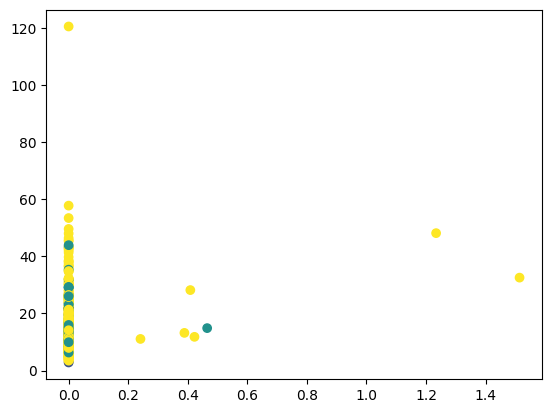

In [87]:
# visulaize the data before scaler
plt.scatter(X1.iloc[:,2],X1.iloc[:,4],c=classes)

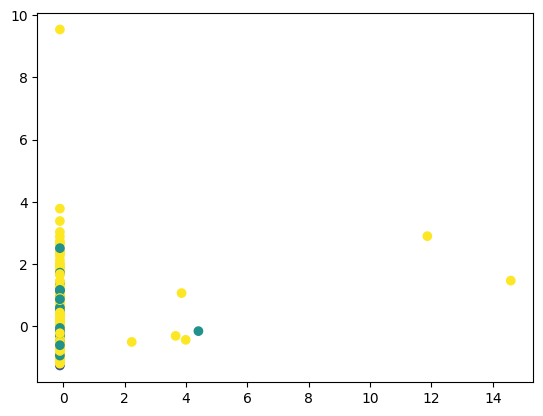

In [56]:
#after scaler
plt.scatter(data[:,2],data[:,4],c=classes)

In [96]:
#Data spliting
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42) 
print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)
print(x_train.shape[1])

# classes_train = np_utils.to_categorical(y_train)
# classes_test = np_utils.to_categorical(y_test)

(298, 5)
(129, 5)
(298, 17072)
(129, 17072)
17072


In [20]:
labels.shape

(427, 5)

In [97]:
def creat_model():
    # Create & train the Deep MLP model with 5 hidden layers  
    model = Sequential()

    # Add the hidden layers and the regulizers
    nb_features = data1.shape[1]
    model.add(Dense(10,input_dim = nb_features, activation = 'relu'))

    model.add(Dense(8, activation='relu'))

    model.add(Dense(4, activation='relu'))

    model.add(Dense(5, activation='softmax'))


    # Compile the model for a multi-class classification problem
    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [22]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(model=creat_model, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
size_batch = [100,150,200,250]
nb_epochs = [50,100,150,200]
param_grid = dict(batch_size=size_batch, epochs=nb_epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(data1, labels)

In [61]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.838324 using {'batch_size': 100, 'epochs': 50}
0.838324 (0.026745) with: {'batch_size': 100, 'epochs': 50}
0.838324 (0.026745) with: {'batch_size': 100, 'epochs': 100}
0.838324 (0.026745) with: {'batch_size': 100, 'epochs': 150}
0.838324 (0.026745) with: {'batch_size': 100, 'epochs': 200}
0.838324 (0.026745) with: {'batch_size': 150, 'epochs': 50}
0.838324 (0.026745) with: {'batch_size': 150, 'epochs': 100}
0.838324 (0.026745) with: {'batch_size': 150, 'epochs': 150}
0.838324 (0.026745) with: {'batch_size': 150, 'epochs': 200}
0.838324 (0.026745) with: {'batch_size': 200, 'epochs': 50}
0.838324 (0.026745) with: {'batch_size': 200, 'epochs': 100}
0.838324 (0.026745) with: {'batch_size': 200, 'epochs': 150}
0.838324 (0.026745) with: {'batch_size': 200, 'epochs': 200}
0.838324 (0.026745) with: {'batch_size': 250, 'epochs': 50}
0.838324 (0.026745) with: {'batch_size': 250, 'epochs': 100}
0.838324 (0.026745) with: {'batch_size': 250, 'epochs': 150}
0.838324 (0.026745) with: {'batch_

In [62]:
model = creat_model()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 100, epochs=50, verbose=0)

In [63]:
# Evalute the model
score = model.evaluate(x_test, y_test, batch_size = 250, verbose = 1)
print("Scores on test set: loss=%s accuracy=%s" % tuple(score))


1/1 [==============================] - 0s 18ms/step - loss: 0.7056 - accuracy: 0.8527
Scores on test set: loss=0.7056474685668945 accuracy=0.8527131676673889


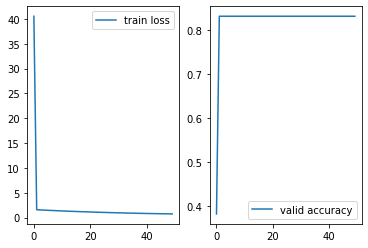

In [64]:
# plot the train loss and the validation loss
plt.figure(1)
plt.subplot(1,2,1)
out = np.asarray(history.history['loss'])
plt.plot(out, label = 'train loss')
plt.legend()

plt.subplot(1,2,2)
out = np.asarray(history.history['accuracy'])
plt.plot(out, label = 'valid accuracy')
plt.legend()

plt.show()

<font size=4>Cross Validation</font>

In [124]:
# %% Model Tuning- Building a Tuned Model with Best Parameters
# Creating Tuned Model Object with KerasClassifier
# example: https://www.kaggle.com/code/muhammetvarl/keras-multiclass-classification-cross-validation/notebook
cv_model = grid_result.best_estimator_
# x_train, x_test, y_train, y_test = train_test_split(data1, classes, test_size=0.2, random_state=42)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-fold accuracy scores

kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(cv_model, x_test, y_test, cv=kfold,scoring= 'accuracy',verbose=0)

In [125]:
print('K-fold Cross Validation f1_weighted Results: ', results)
print('K-fold Cross Validation f1_weighted Results Mean: ', results.mean())

K-fold Cross Validation f1_weighted Results:  [0.88461538 0.80769231 0.84615385 0.88461538 0.84      ]
K-fold Cross Validation f1_weighted Results Mean:  0.8526153846153847


In [130]:
from sklearn.metrics import classification_report
y_test_pred = cv_model.predict(x_test)
# %% f1 score
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(y_test, y_test_pred,average='weighted'))

# %% Accuracy

print("accuracy:",metrics.accuracy_score(y_test, y_test_pred))


f1_weighted: 0.784924264538938
accuracy: 0.8527131782945736


/Users/meimei/miniconda3/envs/DT/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [145]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))
print(model_report)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         1
           4       0.85      1.00      0.92       110

    accuracy                           0.85       129
   macro avg       0.28      0.33      0.31       129
weighted avg       0.73      0.85      0.78       129



/Users/meimei/miniconda3/envs/DT/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meimei/miniconda3/envs/DT/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meimei/miniconda3/envs/DT/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
# from sklearn.metrics import confusion_matrix
confusion_matrix_lr2 = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))
print(confusion_matrix_lr2)

[[  0   0  18]
 [  0   0   1]
 [  0   0 110]]


In [153]:
set(np.argmax(y_test, axis=1).tolist())

{2, 3, 4}

In [154]:
index = set(np.argmax(y_test, axis=1).tolist())

cm_df = pd.DataFrame(confusion_matrix_lr2,
                     index = index, 
                     columns = index)

In [116]:
cm_df

,2.0,3.0,4.0
2.0,0,0,16
3.0,0,0,1
4.0,0,0,69


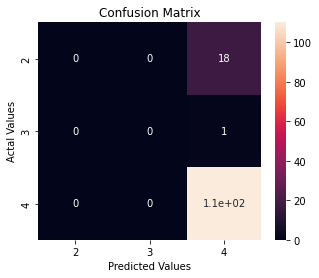

In [155]:
import seaborn as sns
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()